In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import re

from sklearn.cluster import DBSCAN, OPTICS, KMeans
from sklearn.decomposition import PCA

pd.set_option('display.max_rows', None)

In [2]:
DATASET_1_NAME = "HNRNPA2B1"
DATASET_2_NAME = "HNRNPC"

In [3]:
def get_expected_pattern(dataset_name):
    file_name = f'data/{dataset_name}/{dataset_name.lower()}_expected_pattern.txt'
    col_names = ['fshape_coef', 'base']
    expected_pattern_df = pd.read_csv(file_name, delim_whitespace=True, header=None, names=col_names)
    return "".join(expected_pattern_df['base'].values)


def get_promising_patterns(dataset_name):
    expected_pattern = get_expected_pattern(dataset_name)
    promising_patterns = [expected_pattern, f'N{expected_pattern}', f'{expected_pattern}N', f'N{expected_pattern}N']
    return promising_patterns


def get_max_if_no_nan(data: list[float]):
    has_none = None in data
    return max(data) if not has_none else None


def load_all_binding_sites_fshape(dataset_name, promising_patterns):
    folder_path = f'data/{dataset_name}/{dataset_name.lower()}_binding_sites_fshape'
    binding_sites_filenames = os.listdir(folder_path)

    found_fragments = []

    for filename in binding_sites_filenames:
        file_path = os.path.join(folder_path, filename)

        file_data_fshape = []
        file_data_seq = ''

        with open(file_path) as file:
            for line in file:
                columns = line.strip().split('\t')
                if len(columns) == 2:
                    file_data_fshape.append(None if columns[0] == 'NA' else float(columns[0]))
                    file_data_seq += columns[1]

        for pattern in promising_patterns:
            pattern_regexp = f"(?={pattern.replace('N', '.')})"
            matches = re.finditer(pattern=pattern_regexp, string=file_data_seq)

            for m in matches:
                max_fshape = get_max_if_no_nan(file_data_fshape[m.start():m.start() + len(pattern)])
                # print(file_data_seq[m.start():m.start() + len(pattern)],  max_fshape)
                if max_fshape is not None and max_fshape > 1:
                    found_fragments.append((file_data_seq[m.start():m.start() + len(pattern)], file_data_fshape[m.start():m.start() + len(pattern)]))

    return found_fragments

### Dataset `HNRNPA2B1`

In [4]:
expected_pattern_1 = get_expected_pattern(DATASET_1_NAME)
expected_pattern_1

'NNAGGNNTAGN'

In [5]:
promising_patterns_1 = get_promising_patterns(DATASET_1_NAME)
promising_patterns_1

['NNAGGNNTAGN', 'NNNAGGNNTAGN', 'NNAGGNNTAGNN', 'NNNAGGNNTAGNN']

In [6]:
found_fragments_1 = load_all_binding_sites_fshape(DATASET_1_NAME, promising_patterns_1)
print(f'Found {len(found_fragments_1)} frangments:')
found_fragments_1

Found 6 frangments:


[('AGAGGAGTAGT',
  [1.30121688824,
   1.06751861215,
   0.936459443018,
   0.195378853471,
   -0.0231903839201,
   0.251223602852,
   -0.210577433762,
   -0.0885665303939,
   0.381480959437,
   0.434266579299,
   -0.624187537071]),
 ('TAGAGGAGTAGT',
  [2.02110749457,
   1.30121688824,
   1.06751861215,
   0.936459443018,
   0.195378853471,
   -0.0231903839201,
   0.251223602852,
   -0.210577433762,
   -0.0885665303939,
   0.381480959437,
   0.434266579299,
   -0.624187537071]),
 ('ACAGGTCTAGT',
  [1.49443149053,
   8.00861006864,
   2.31010397366,
   11.4748046657,
   -1.86790045752,
   -0.623245622629,
   -0.938508533817,
   -0.157109079029,
   0.577845749704,
   1.85380814284,
   2.22763819719]),
 ('CACAGGTCTAGT',
  [0.773139237766,
   1.49443149053,
   8.00861006864,
   2.31010397366,
   11.4748046657,
   -1.86790045752,
   -0.623245622629,
   -0.938508533817,
   -0.157109079029,
   0.577845749704,
   1.85380814284,
   2.22763819719]),
 ('ACAGGTCTAGTA',
  [1.49443149053,
   8.008610

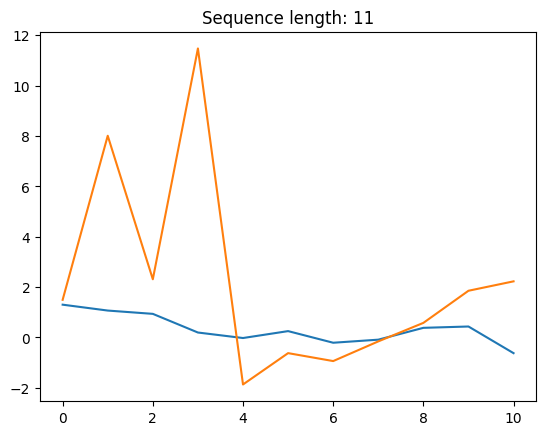

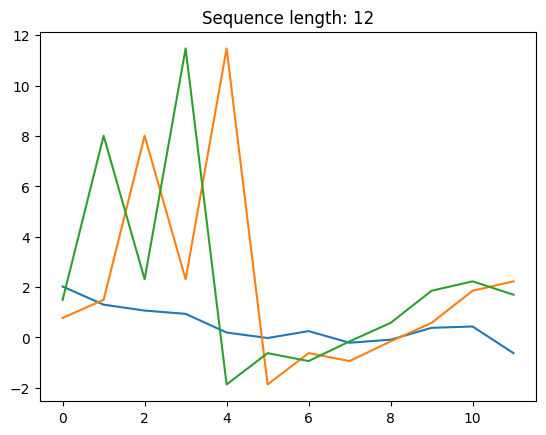

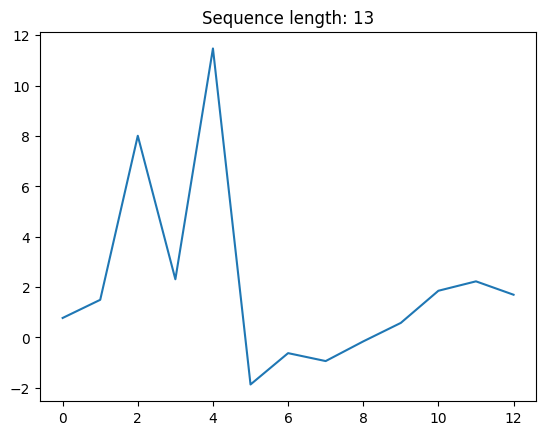

{11: [[1.30121688824,
   1.06751861215,
   0.936459443018,
   0.195378853471,
   -0.0231903839201,
   0.251223602852,
   -0.210577433762,
   -0.0885665303939,
   0.381480959437,
   0.434266579299,
   -0.624187537071],
  [1.49443149053,
   8.00861006864,
   2.31010397366,
   11.4748046657,
   -1.86790045752,
   -0.623245622629,
   -0.938508533817,
   -0.157109079029,
   0.577845749704,
   1.85380814284,
   2.22763819719]],
 12: [[2.02110749457,
   1.30121688824,
   1.06751861215,
   0.936459443018,
   0.195378853471,
   -0.0231903839201,
   0.251223602852,
   -0.210577433762,
   -0.0885665303939,
   0.381480959437,
   0.434266579299,
   -0.624187537071],
  [0.773139237766,
   1.49443149053,
   8.00861006864,
   2.31010397366,
   11.4748046657,
   -1.86790045752,
   -0.623245622629,
   -0.938508533817,
   -0.157109079029,
   0.577845749704,
   1.85380814284,
   2.22763819719],
  [1.49443149053,
   8.00861006864,
   2.31010397366,
   11.4748046657,
   -1.86790045752,
   -0.623245622629,
 

In [7]:
def plot_fshape_profiles(fshape_profiles_grupped_by_length):
    for sequence_length in fshape_profiles_grupped_by_length.keys():
        for profile in fshape_profiles_grupped_by_length[sequence_length]:
            plt.plot(profile)
        plt.title(f'Sequence length: {sequence_length}')
        plt.show()


def get_f_shape_profile_groups(found_fragments):
    fshape_profiles_grupped_by_length = {}

    for sequence, profile in found_fragments:
        w = len(sequence)
        
        if w in fshape_profiles_grupped_by_length:
            fshape_profiles_grupped_by_length[w].append(profile)
        else:
            fshape_profiles_grupped_by_length[w] = [profile]

    plot_fshape_profiles(fshape_profiles_grupped_by_length)

    return fshape_profiles_grupped_by_length


fshape_profiles_grupped_by_length_1 = get_f_shape_profile_groups(found_fragments_1)
fshape_profiles_grupped_by_length_1

c:\Users\karin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


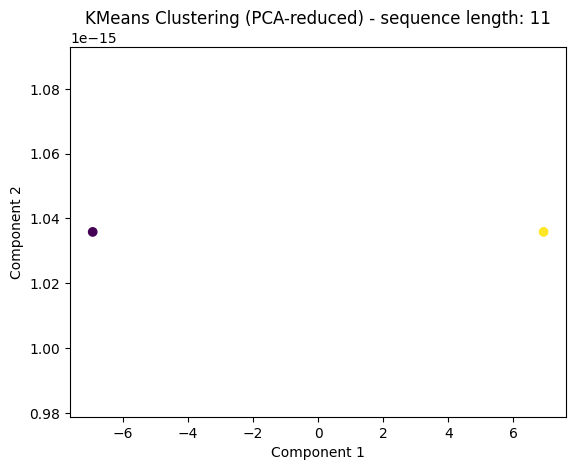

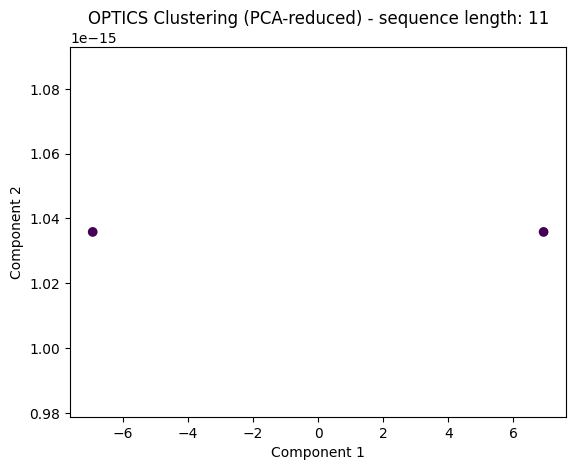

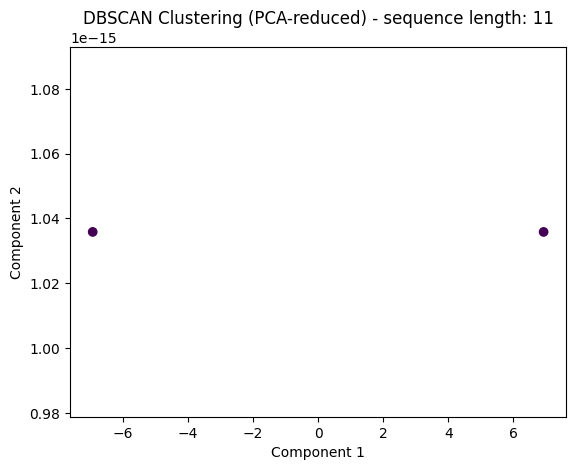

c:\Users\karin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


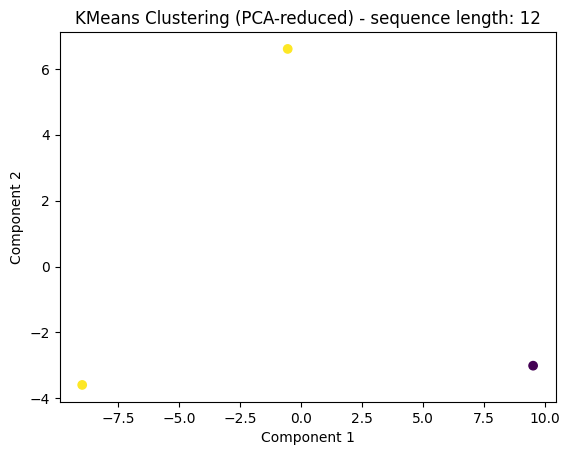

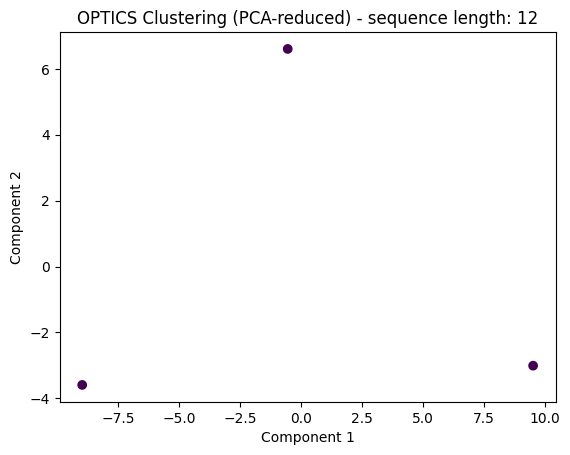

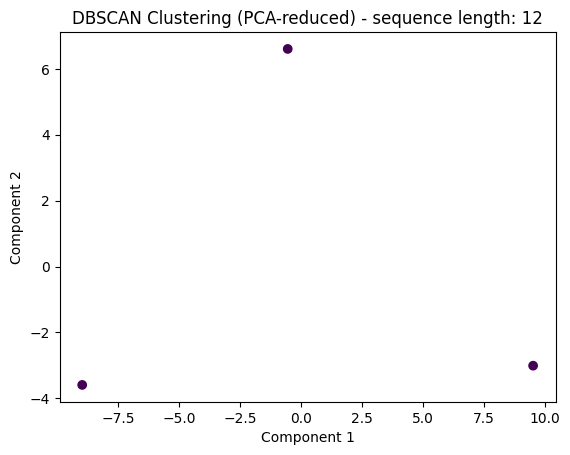

In [8]:
def clustering(data, sequence_length, model, model_name):
    model.fit(data)

    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    
    labels = model.labels_
    
    plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title(f'{model_name} Clustering (PCA-reduced) - sequence length: {sequence_length}')
    plt.show()

    return labels


for sequence_length in fshape_profiles_grupped_by_length_1.keys():
    sequences = fshape_profiles_grupped_by_length_1[sequence_length]
    if len(sequences) >= 2:
        labels_kmeans = clustering(sequences, sequence_length, KMeans(n_clusters=2), 'KMeans')
        labels_optics = clustering(sequences, sequence_length, OPTICS(min_samples=2), 'OPTICS')
        labels_dbscan = clustering(sequences, sequence_length, DBSCAN(eps=1, min_samples=2), 'DBSCAN')

### Dataset `HNRNPC`

In [9]:
promising_patterns_2 = get_promising_patterns(DATASET_2_NAME)
promising_patterns_2

['NTTTTN', 'NNTTTTN', 'NTTTTNN', 'NNTTTTNN']

In [10]:
found_fragments_2 = load_all_binding_sites_fshape(DATASET_2_NAME, promising_patterns_2)
print(f'Found {len(found_fragments_2)} frangments:')
found_fragments_2

Found 153 frangments:


[('ATTTTA',
  [0.404163949446,
   1.35271797955,
   1.19380260557,
   1.30121220546,
   0.712771921772,
   1.52964040357]),
 ('ATTTTT',
  [1.52964040357,
   1.28139186842,
   0.854860160535,
   0.790466576012,
   0.951541773153,
   0.24134137645]),
 ('TTTTTG',
  [1.28139186842,
   0.854860160535,
   0.790466576012,
   0.951541773153,
   0.24134137645,
   -0.0203077444831]),
 ('TATTTTA',
  [0.301769702724,
   0.404163949446,
   1.35271797955,
   1.19380260557,
   1.30121220546,
   0.712771921772,
   1.52964040357]),
 ('TATTTTT',
  [0.712771921772,
   1.52964040357,
   1.28139186842,
   0.854860160535,
   0.790466576012,
   0.951541773153,
   0.24134137645]),
 ('ATTTTTG',
  [1.52964040357,
   1.28139186842,
   0.854860160535,
   0.790466576012,
   0.951541773153,
   0.24134137645,
   -0.0203077444831]),
 ('ATTTTAT',
  [0.404163949446,
   1.35271797955,
   1.19380260557,
   1.30121220546,
   0.712771921772,
   1.52964040357,
   1.28139186842]),
 ('ATTTTTG',
  [1.52964040357,
   1.28139186

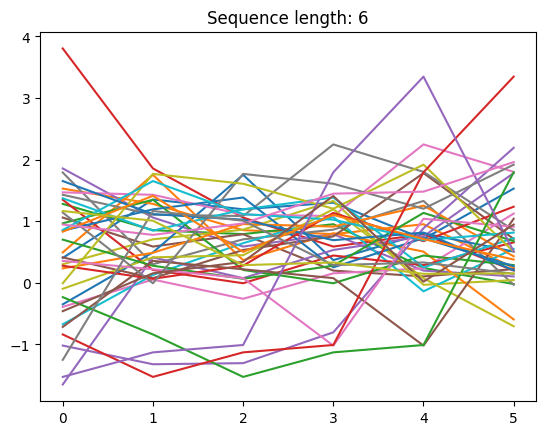

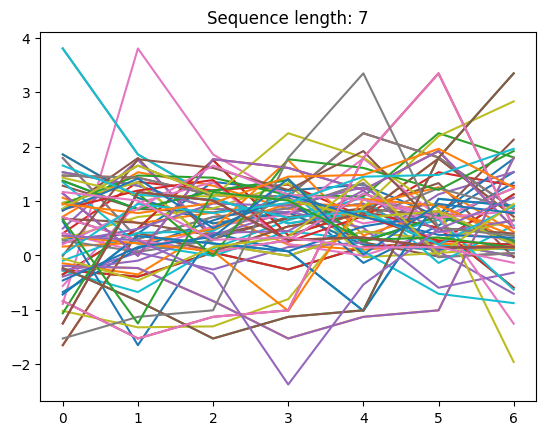

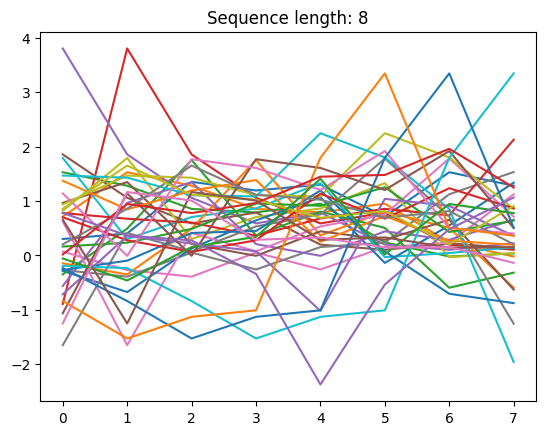

{6: [[0.404163949446,
   1.35271797955,
   1.19380260557,
   1.30121220546,
   0.712771921772,
   1.52964040357],
  [1.52964040357,
   1.28139186842,
   0.854860160535,
   0.790466576012,
   0.951541773153,
   0.24134137645],
  [1.28139186842,
   0.854860160535,
   0.790466576012,
   0.951541773153,
   0.24134137645,
   -0.0203077444831],
  [3.80501636465,
   1.85681749993,
   1.05934741504,
   0.588400203698,
   0.789272273139,
   0.198409735431],
  [1.85681749993,
   1.05934741504,
   0.588400203698,
   0.789272273139,
   0.198409735431,
   0.103526897152],
  [1.05934741504,
   0.588400203698,
   0.789272273139,
   0.198409735431,
   0.103526897152,
   0.222436777088],
  [-0.390646599402,
   0.0530602310675,
   -0.259132311733,
   0.153811483002,
   0.234654106583,
   1.12386453601],
  [1.79096370409,
   0.301412348494,
   0.706009963175,
   0.863162380644,
   1.32958228798,
   -0.0324066397908],
  [0.301412348494,
   0.706009963175,
   0.863162380644,
   1.32958228798,
   -0.0324066

In [11]:
fshape_profiles_grupped_by_length_2 = get_f_shape_profile_groups(found_fragments_2)
fshape_profiles_grupped_by_length_2

c:\Users\karin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


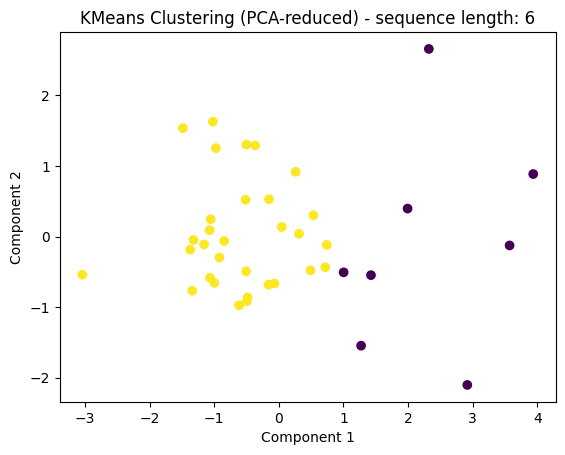

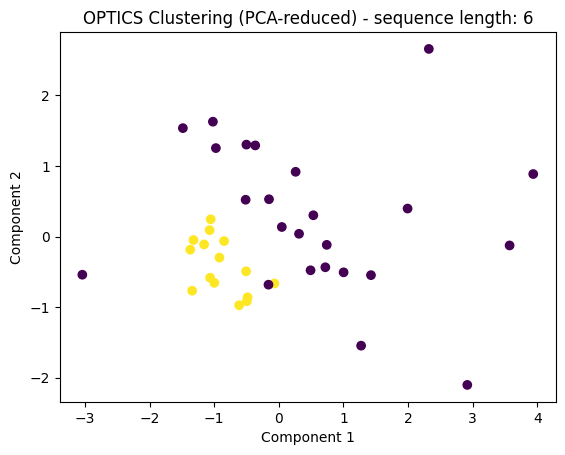

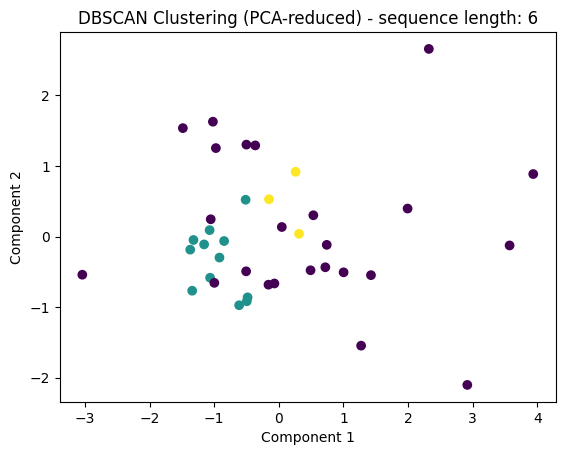

c:\Users\karin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


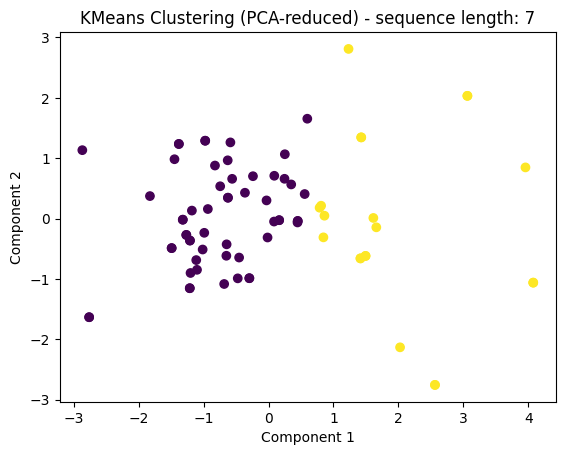

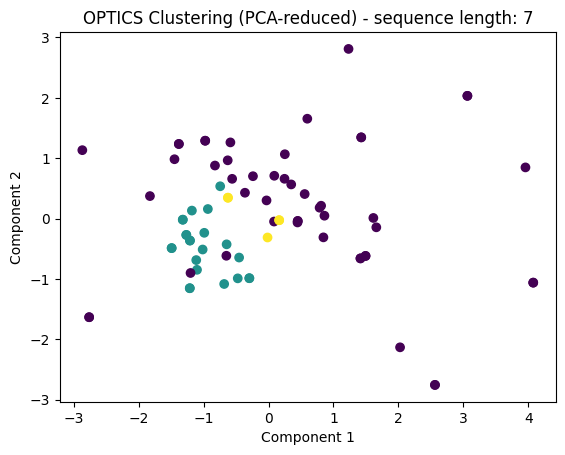

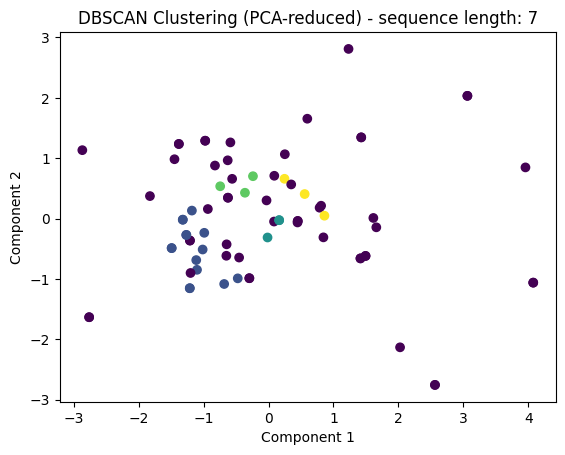

c:\Users\karin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


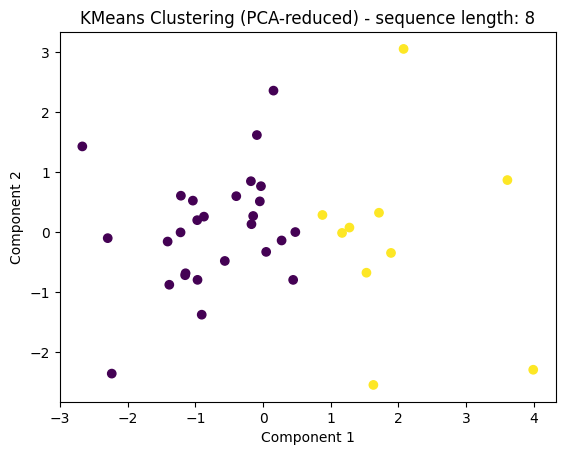

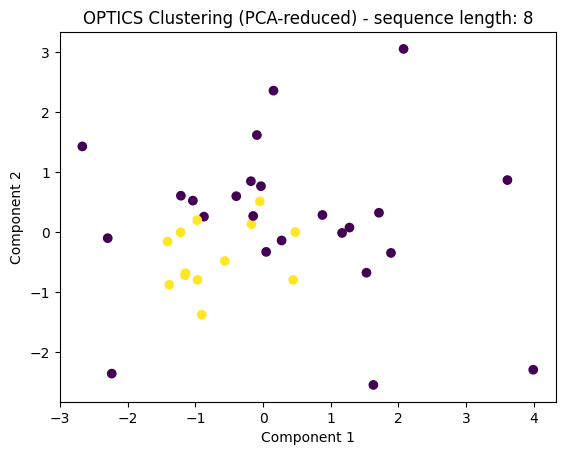

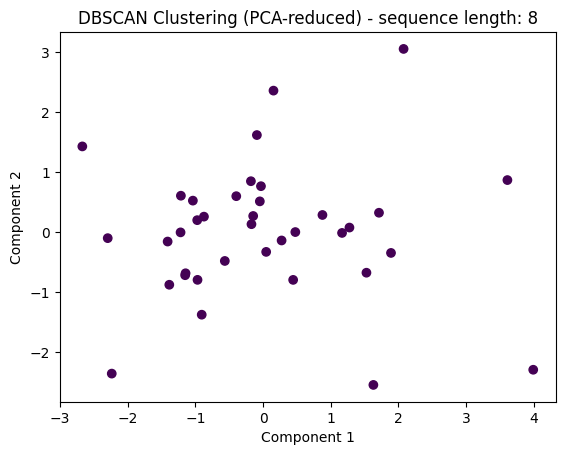

In [12]:
for sequence_length in fshape_profiles_grupped_by_length_2.keys():
    labels_kmeans = clustering(fshape_profiles_grupped_by_length_2[sequence_length], sequence_length, KMeans(n_clusters=2), 'KMeans')
    labels_optics = clustering(fshape_profiles_grupped_by_length_2[sequence_length], sequence_length, OPTICS(), 'OPTICS')
    labels_dbscan = clustering(fshape_profiles_grupped_by_length_2[sequence_length], sequence_length, DBSCAN(min_samples=3, eps=1), 'DBSCAN')